In [116]:
import pandas as pd

df = pd.read_csv('../data/raw/train.csv')
print(f"df.shape: {df.shape}")
print(f"df.dtypes:  \n{df.dtypes}")
df.head()

df.shape: (891, 12)
df.dtypes:  
PassengerId      int64
Survived         int64
Pclass           int64
Name               str
Sex                str
Age            float64
SibSp            int64
Parch            int64
Ticket             str
Fare           float64
Cabin              str
Embarked           str
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Find NaN and duplicated**

In [117]:
missing_values = df.isna().sum().sort_values(ascending=False)

print(f"Missing values:\n{missing_values}", end="\n\n")
print(f"Duplicated values:\n{df.duplicated().sum()}")

Missing values:
Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

Duplicated values:
0


**Drop unnecessary columns**

In [118]:
cols_to_drop = ["Name", "Ticket", "Cabin"]
df_small = df.drop(columns=cols_to_drop).copy()
dup = df_small[df_small.duplicated(keep=False)]
dup.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [119]:
cols_to_drop = ["Name", "Ticket", "Cabin"]

df = df.copy()
df = df.drop(columns=cols_to_drop)
print(f"Duplicated values:\n{df.duplicated().sum()}")
df.head()

Duplicated values:
0


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [120]:
df = df.copy()

**outliers**

In [121]:
num_cols = ["Age", "Fare"]
for col in num_cols:
    print(f"\n{col}")
    print(df.groupby("Sex")[col].agg(["min", "max", "mean", "std", "count"]))


Age
         min   max       mean        std  count
Sex                                            
female  0.75  63.0  27.915709  14.110146    261
male    0.42  80.0  30.726645  14.678201    453

Fare
         min       max       mean        std  count
Sex                                                
female  6.75  512.3292  44.479818  57.997698    314
male    0.00  512.3292  25.523893  43.138263    577


**Survival rate `["Sex", "Pclass", "Embarked"]`**

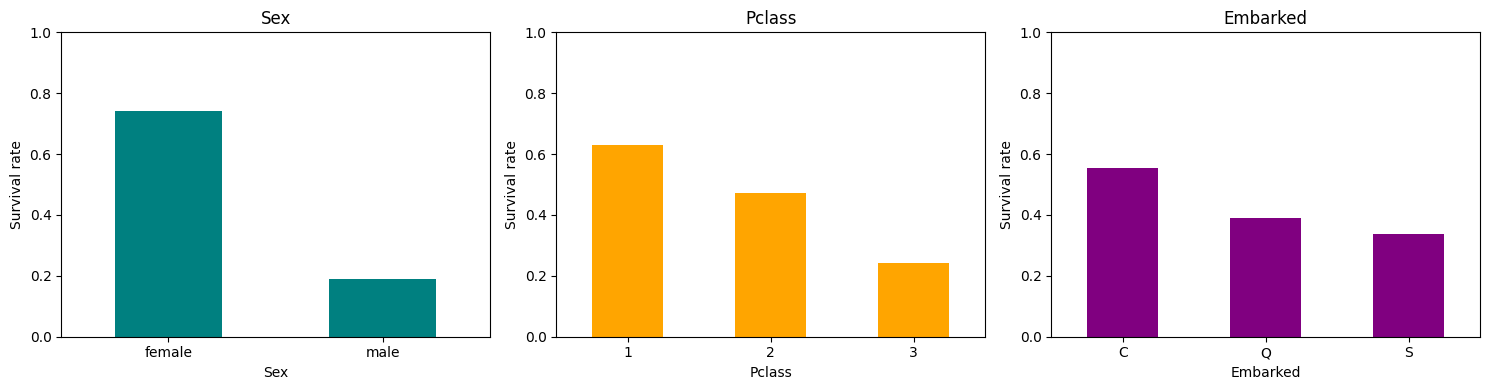

In [122]:
import matplotlib.pyplot as plt


def plot_survival_rates(df, columns, orders=None, colors=None):
    n = len(columns)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 4))

    if n == 1:
        axes = [axes]

    for i, (ax, col) in enumerate(zip(axes, columns)):
        rates = df.groupby(col)["Survived"].mean()

        if orders and col in orders:
            rates = rates.reindex(orders[col])

        color = colors[i] if colors else None
        rates.plot(kind="bar", ax=ax, color=color)

        ax.set_title(col)
        ax.set_ylim(0, 1)
        ax.set_ylabel("Survival rate")
        ax.tick_params(axis="x", rotation=0)

    plt.tight_layout()
    plt.show()


plot_survival_rates(
    df,
    ["Sex", "Pclass", "Embarked"],
    orders={"Pclass": [1, 2, 3], "Embarked": ["C", "Q", "S"]},
    colors=["teal", "orange", "purple"],
)

**Fill NaN values**

`Age`

<small>Fill with most common value grouped by `[Pclass, Sex, Embarked]`</small>

In [123]:
df["Age"] = df["Age"].fillna(df.groupby(["Pclass", "Sex", "Embarked"])["Age"].transform("median"))
print(df.isna().sum().sort_values(ascending=False))
print(f"Duplicated: {df.duplicated().sum()}")

Embarked       2
PassengerId    0
Survived       0
Sex            0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64
Duplicated: 0


`Embarked`

<small>Fill with most common value grouped by `Pclass`</small>

In [124]:
df["Embarked"] = df["Embarked"].fillna(
    df.groupby("Pclass")["Embarked"].transform(lambda x: x.mode()[0])
)
print(df.isna().sum().sort_values(ascending=False))
print(f"Duplicated: {df.duplicated().sum()}")

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
Duplicated: 0
